In [1]:
import yt
import os
import pysimulationio
from pysimulationio import H5
import re
from pysimulationio import SimulationIO as SIO
from pysimulationio import RegionCalculus as RC
import numpy as np
%matplotlib inline

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Inspection

In [2]:
fpath = '/home/jmiller/programming/SimulationIO-yt-tests/cactus/qc0-mclachlan-cell-centred-t0.s5'

configurationname='iteration.0000000000-timelevel.0'
print fpath
print configurationname

/home/jmiller/programming/SimulationIO-yt-tests/cactus/qc0-mclachlan-cell-centred-t0.s5
iteration.0000000000-timelevel.0


In [3]:
ds = yt.load(fpath,
             configuration=configurationname)

yt : [INFO     ] 2016-12-06 15:31:08,688 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-12-06 15:31:08,944 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [INFO     ] 2016-12-06 15:31:08,947 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-12-06 15:31:08,949 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.02"
yt : [INFO     ] 2016-12-06 15:31:08,951 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.03"
yt : [INFO     ] 2016-12-06 15:31:08,952 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.04"
yt : [INFO     ] 2016-12-06 15:31:08,953 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.05"
yt : [INFO     ] 2016-12-06 15:31:08,954 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.06"
yt : [INFO     ] 2016-12-06 15:3

In [4]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	    64	       2515456	           136
  1	    64	       3329408	           150
  2	    64	        462080	            78
  3	    64	        485184	            79
  4	    64	        554496	            83
  5	    64	        670016	            88
  6	    64	        924160	            98
----------------------------------------------
   	   448	       8940800


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 1.308e-21 Mpc
	Width: 1.308e-15 pc
	Width: 2.699e-10 AU
	Width: 4.037e+03 cm


In [5]:
ds.field_list

[('simulationio', 'ADMBASE::alp'),
 ('simulationio', 'ADMBASE::beta[0]'),
 ('simulationio', 'ADMBASE::beta[1]'),
 ('simulationio', 'ADMBASE::beta[2]'),
 ('simulationio', 'ADMBASE::dtalp'),
 ('simulationio', 'ADMBASE::dtbeta[0]'),
 ('simulationio', 'ADMBASE::dtbeta[1]'),
 ('simulationio', 'ADMBASE::dtbeta[2]'),
 ('simulationio', 'ADMBASE::g[00]'),
 ('simulationio', 'ADMBASE::g[01]'),
 ('simulationio', 'ADMBASE::g[02]'),
 ('simulationio', 'ADMBASE::g[11]'),
 ('simulationio', 'ADMBASE::g[12]'),
 ('simulationio', 'ADMBASE::g[22]'),
 ('simulationio', 'ADMBASE::k[00]'),
 ('simulationio', 'ADMBASE::k[01]'),
 ('simulationio', 'ADMBASE::k[02]'),
 ('simulationio', 'ADMBASE::k[11]'),
 ('simulationio', 'ADMBASE::k[12]'),
 ('simulationio', 'ADMBASE::k[22]'),
 ('simulationio', 'GRID::r'),
 ('simulationio', 'GRID::x'),
 ('simulationio', 'GRID::y'),
 ('simulationio', 'GRID::z'),
 ('simulationio', 'ML_ADMCONSTRAINTS::H'),
 ('simulationio', 'ML_ADMCONSTRAINTS::M[0]'),
 ('simulationio', 'ML_ADMCONSTRAINT

In [6]:
ds.derived_field_list

[('gas', 'cell_volume'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dz'),
 ('gas', 'extrinsic_curvature_xx'),
 ('gas', 'extrinsic_curvature_xy'),
 ('gas', 'extrinsic_curvature_xz'),
 ('gas', 'extrinsic_curvature_yx'),
 ('gas', 'extrinsic_curvature_yy'),
 ('gas', 'extrinsic_curvature_yz'),
 ('gas', 'extrinsic_curvature_zx'),
 ('gas', 'extrinsic_curvature_zy'),
 ('gas', 'extrinsic_curvature_zz'),
 ('gas', 'hamiltonian_constraint'),
 ('gas', 'lapse'),
 ('gas', 'metric_determinant'),
 ('gas', 'metric_volume_form'),
 ('gas', 'metric_xx'),
 ('gas', 'metric_xy'),
 ('gas', 'metric_xz'),
 ('gas', 'metric_yx'),
 ('gas', 'metric_yy'),
 ('gas', 'metric_yz'),
 ('gas', 'metric_zx'),
 ('gas', 'metric_zy'),
 ('gas', 'metric_zz'),
 ('gas', 'momentum_constraint_x'),
 ('gas', 'momentum_constraint_y'),
 ('gas', 'momentum_constraint_z'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'r'),
 ('gas', 'shift_magnitude'),
 ('gas', 'shift_x'),
 ('gas', 'shift_y'),
 (

In [7]:
print ds.domain_width

[ 238.  238.  238.] code_length


## Simple Visualization

yt : [INFO     ] 2016-12-06 15:31:31,243 Reading 6760954 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[00]', 'ADMBASE::g[22]']
yt : [INFO     ] 2016-12-06 15:31:56,156 Reading 6760954 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[22]', 'ADMBASE::g[01]', 'ADMBASE::g[12]', 'ADMBASE::g[02]', 'ADMBASE::g[00]']
yt : [INFO     ] 2016-12-06 15:32:43,016 Reading 1376678 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[00]', 'ADMBASE::g[22]']
yt : [INFO     ] 2016-12-06 15:32:48,917 Reading 1376678 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[22]', 'ADMBASE::g[01]', 'ADMBASE::g[12]', 'ADMBASE::g[02]', 'ADMBASE::g[00]']
yt : [INFO     ] 2016-12-06 15:32:57,848 Projection completed
yt : [INFO     ] 2016-12-06 15:32:57,853 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:32:57,856 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:32:57,865 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:32:57,868 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:32:57,8


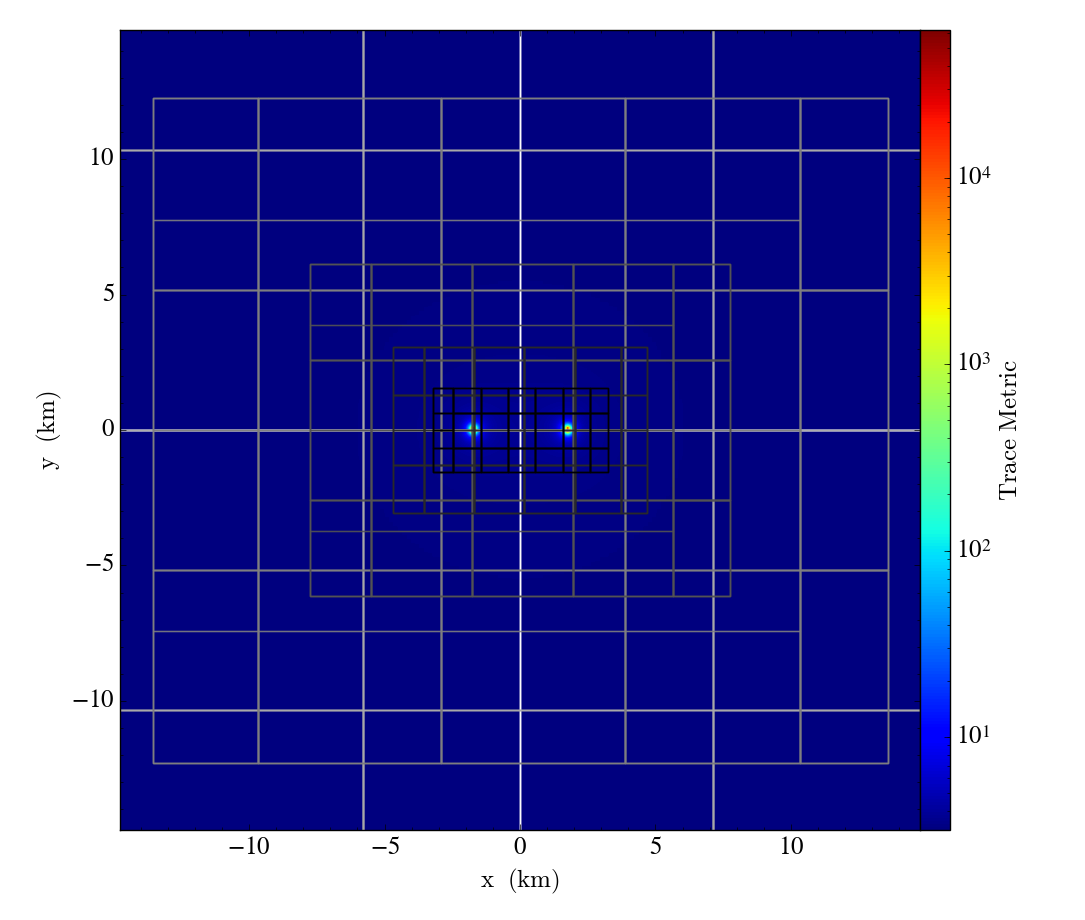

In [8]:
p = yt.ProjectionPlot(ds, "z", "trace_metric",width=20,weight_field='metric_volume_form')
p.set_cmap(field="all", cmap="jet")
p.set_log('lapse',False)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:33:01,668 Reading 65920 cells for fields ['ADMBASE::g[11]', 'ADMBASE::g[22]', 'ADMBASE::g[01]', 'ADMBASE::g[12]', 'ADMBASE::g[02]', 'ADMBASE::g[00]']
yt : [INFO     ] 2016-12-06 15:33:12,925 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:12,928 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:12,934 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:12,936 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:12,941 Making a fixed resolution buffer of (('gas', 'metric_volume_form')) 800 by 800



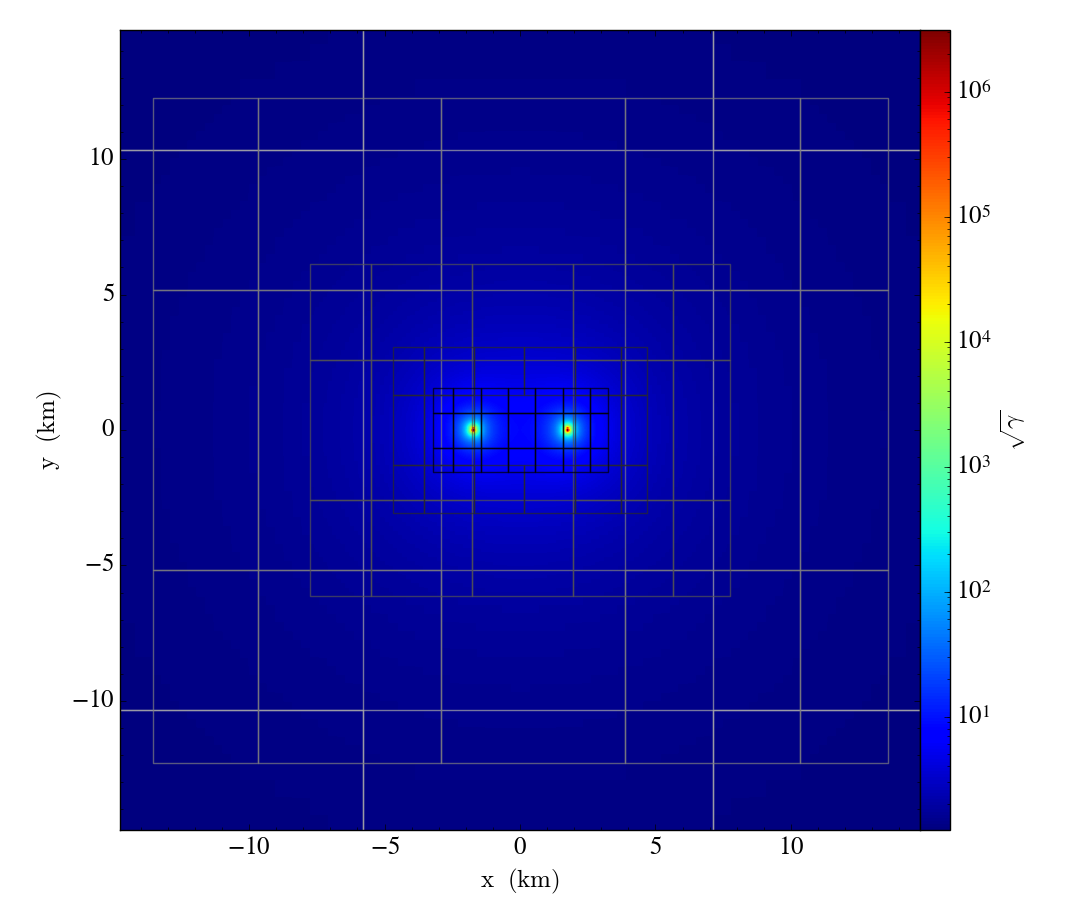

In [9]:
p = yt.SlicePlot(ds, "z", "metric_volume_form",width=20)
p.set_cmap(field="all", cmap="jet")
p.set_log('lapse',True)
p.annotate_grids()
p.show()

yt : [INFO     ] 2016-12-06 15:33:15,587 Reading 65920 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:20,934 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:20,937 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:20,942 xlim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:20,945 ylim = -10.000000 10.000000
yt : [INFO     ] 2016-12-06 15:33:20,950 Making a fixed resolution buffer of (('gas', 'weyl_scalar_4_magnitude')) 800 by 800



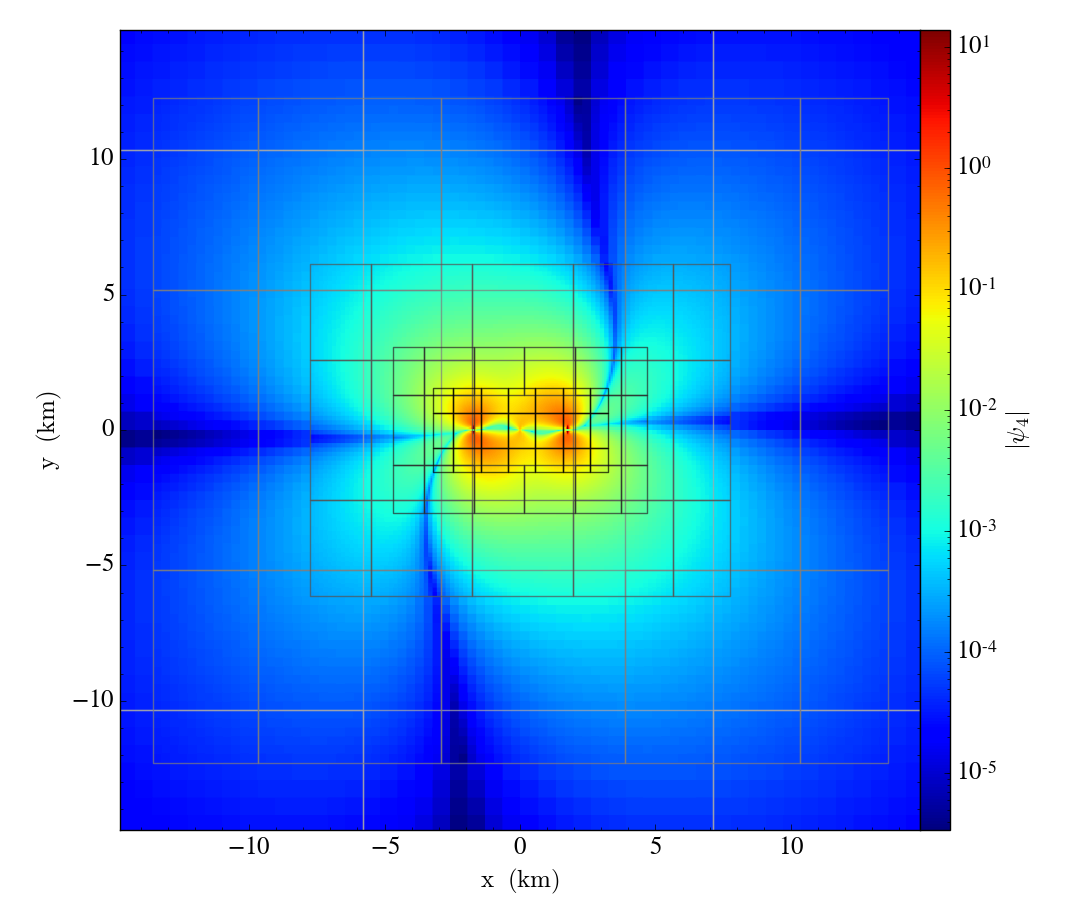

yt : [INFO     ] 2016-12-06 15:33:24,622 Saving plot bbh-power-radiated.png


['bbh-power-radiated.png']

In [10]:
p = yt.SlicePlot(ds, "z", "weyl_scalar_4_magnitude",width=20)
p.set_cmap(field="all", cmap="jet")
p.set_log('lapse',True)
p.annotate_grids()
p.show()
p.save('bbh-power-radiated.png')

yt : [INFO     ] 2016-12-06 15:33:25,939 xlim = -119.000000 119.000000
yt : [INFO     ] 2016-12-06 15:33:25,942 ylim = -119.000000 119.000000
yt : [INFO     ] 2016-12-06 15:33:25,944 zlim = -119.000000 119.000000
yt : [INFO     ] 2016-12-06 15:33:25,947 Making a fixed resolution buffer of (('gas', 'weyl_scalar_4_magnitude')) 800 by 800
yt : [INFO     ] 2016-12-06 15:33:26,126 Reading 35937 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:26,214 Reading 38115 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:26,312 Reading 39204 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:26,410 Reading 34848 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:26,965 Reading 38115 cells for fields ['WEYLSCAL4::Psi4r', 'WEYLSCAL4::Psi4i']
yt : [INFO     ] 2016-12-06 15:33:27,073 Reading 40425 cells for fields ['WEYLSCAL4::Psi4r', 'WEY


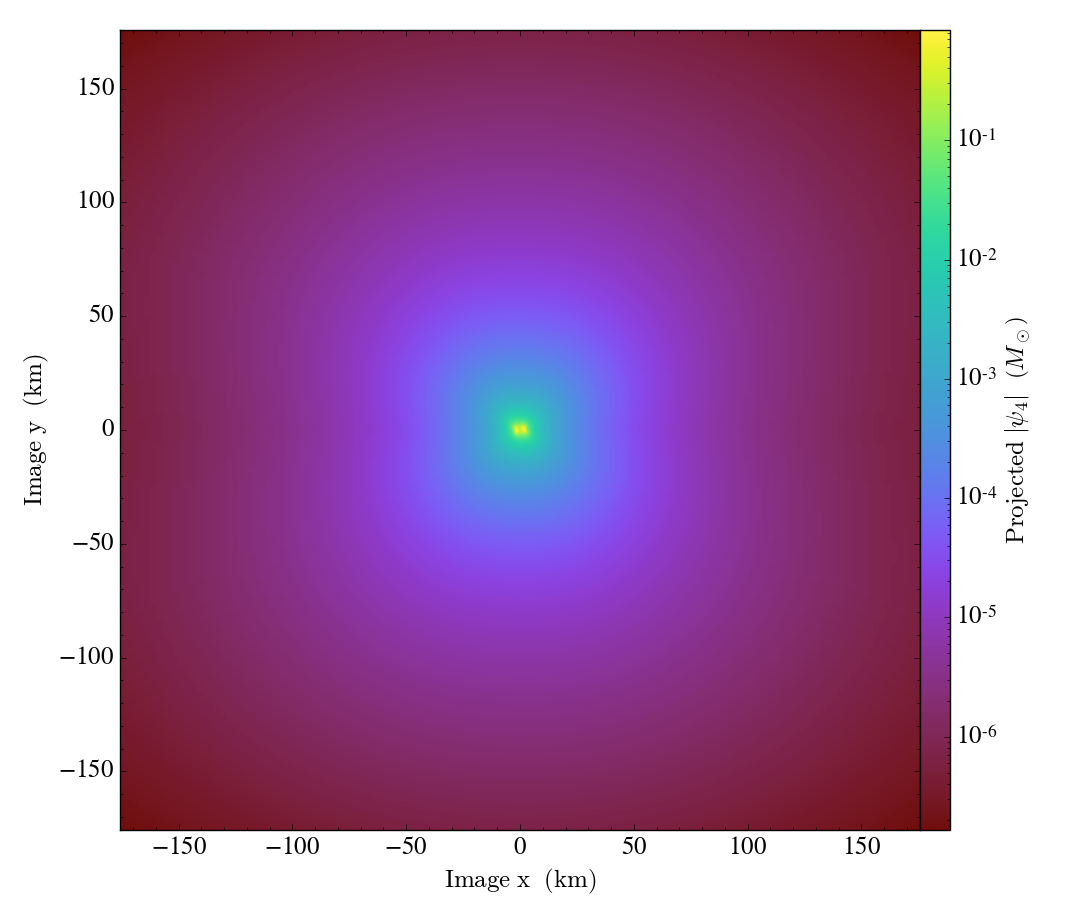

In [11]:
L=[0,1,1]
c=[0,0,0]
im = yt.OffAxisProjectionPlot(ds,L,'weyl_scalar_4_magnitude',c)
im.show()